# Clustering Using Scikit-learn

Import and merge WHR data, producing both a dataframe containing the raw numerical data (named ```df2```) and a second dataframe containing the scaled numerical data (named ```X_scaled```), in which scaling has been done to normalize each column to have zero mean and unit standard deviation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
key_vars = ['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']

# read in data from SupportingFactors worksheet into a new dataframe dfsupp
dfsupp = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='SupportingFactors')

# extract out region information from SupportingFactors dataframe
regions = dfsupp[['country', 'Region indicator']].rename({'Region indicator': 'region'}, axis=1)

# compute the mean values of all the WHR data for each country, averaging over all years in the dataset
dfmean = df.groupby('country').mean().drop('year', axis=1)

# merge the mean WHR data with the region information extracted previously
df2 = pd.merge(dfmean, regions, on='country').dropna()

# set the index of df2 to be the country name
df2.set_index('country', inplace=True)

# import the StandardScaler
from sklearn.preprocessing import StandardScaler

# extract out the numerical data and scale it to zero mean and unit standard deviation
X = df2[key_vars]
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)


# examine the df2 dataframe -- mean WHR values for each country, along with associated regions
df2

,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,region
country,,,,,,,,,,
Afghanistan,3.806614,0.580873,0.301283,7.419697,0.517146,50.838271,0.544895,0.118428,0.826794,South Asia
Albania,4.988791,0.642628,0.303256,9.247059,0.723204,68.027213,0.626155,-0.105019,0.859691,Central and Eastern Europe
Algeria,5.555004,0.616524,0.265460,9.501728,0.804633,64.984461,0.536398,-0.208236,0.661478,Middle East and North Africa
Angola,4.420299,0.613339,0.351173,8.713935,0.737973,51.729801,0.455957,-0.077940,0.867018,Sub-Saharan Africa
Argentina,6.406131,0.840998,0.273187,9.826051,0.906080,66.764205,0.753122,-0.154544,0.844038,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.414997,0.823428,0.219652,9.706075,0.925062,64.120754,0.682923,-0.192087,0.782355,Latin America and Caribbean
Vietnam,5.293268,0.631631,0.209818,8.477400,0.827200,65.357492,0.871811,0.019168,0.781401,Southeast Asia
Yemen,3.969106,0.536306,0.299466,8.191046,0.721817,54.056593,0.626482,-0.132600,0.833238,Middle East and North Africa


In [2]:
X_scaled

,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
country,,,,,,,,,
Afghanistan,-1.443128,-1.438896,-2.425953,-1.333584,-1.397623,0.735439,0.451854,-1.262731,0.471370
Albania,-0.360792,0.054466,-0.681799,0.776161,-0.776670,-0.719736,0.632648,-0.638194,0.499009
Algeria,0.157600,0.262588,0.007447,0.402698,-1.462554,-1.391919,-0.456675,-0.902184,-0.030449
Angola,-0.881273,-0.381215,-0.556782,-1.224159,-2.077245,-0.543385,0.672914,-0.934399,1.170248
Argentina,0.936845,0.527632,0.866136,0.621142,0.193546,-1.042257,0.546624,1.367958,0.077797
...,...,...,...,...,...,...,...,...,...
Venezuela,0.944963,0.429584,1.026807,0.296688,-0.342879,-1.286749,0.207632,1.190270,-0.672139
Vietnam,-0.082030,-0.574517,0.198462,0.448484,1.100508,0.089020,0.202390,-0.749403,-0.809898
Yemen,-1.294360,-0.808532,-0.693534,-0.938572,-0.774178,-0.899352,0.487271,-1.713444,0.445918


The goal is to examine how similar different countries are to each other based on their indicator data.  Are there natural groupings or clusters of countries based upon similarity of their indicators? To begin, I create a heatmap of the dataset ```X_scaled```.

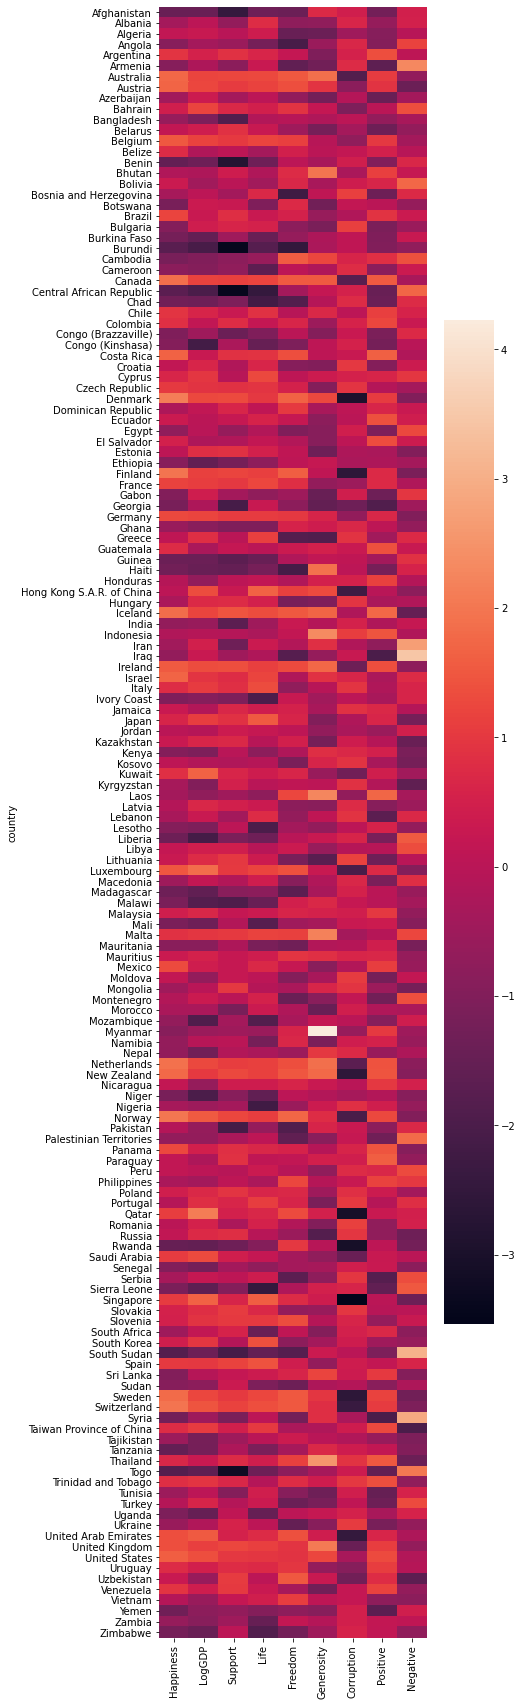

In [2]:
plt.figure(figsize = (6,30))
sns.heatmap(X_scaled)


First, I use K-Means to specify in advance how many clusters to group the data into (k).
(k-means works by finding a set of "centroid" points at the center of each cluster, so that every data point within a cluster is closer to the center of its own cluster than to the centroid of a different cluster.) 

(In a hypothetical dataset with N data points, a "perfect but meaningless" clustering of the data would involve making as many clusters as there are data points, that is, setting k = N.  In such a scenario, every data point would be in its own cluster, perfectly identical to itself, but meaningless in terms of revealing structure and patterns in the data.  In the opposite limit, k = 1, all the data points would be in the same cluster, which leaves us no better than where we started.  The point of clustering is to find a number of clusters k (somewhere between 1 and N) that captures substructure within the data.) 

For the WHR dataset, I start by hypothesizing k = the number of different regions that are contained in the ```df2``` dataframe.  This is to see how well the clustering reflects the region data already contained in  ```df2``` .

In [3]:
# How many unique regions are there in df2? 
k =df2['region'].nunique()

Having identified the number of clusters I am looking for, I continue with k-Means. 
I initialize a `KMeans` cluster object to identify ```k``` clusters, and assign this object to the variable ```kcluster``` &mdash; then I call the ```fit``` method on ```kcluster``` to fit the data in the ```X_scaled``` dataframe

In [5]:
from sklearn.cluster import KMeans 
kcluster = KMeans(n_clusters=k)
kcluster.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Query the attribte ```labels_``` of the cluster object, an array of integers that assigns a cluster label to each entry in the dataset.  

In [6]:
kcluster.labels_

array([7, 9, 9, 2, 1, 0, 4, 4, 9, 1, 3, 9, 1, 6, 7, 5, 6, 9, 8, 1, 9, 3,
       7, 5, 3, 4, 7, 7, 6, 6, 2, 3, 1, 9, 6, 1, 4, 6, 6, 2, 6, 8, 3, 4,
       1, 2, 2, 1, 3, 9, 6, 7, 7, 6, 4, 9, 4, 3, 5, 0, 0, 4, 1, 9, 3, 6,
       1, 9, 8, 3, 8, 1, 8, 5, 9, 9, 3, 7, 6, 9, 4, 9, 3, 3, 6, 3, 6, 3,
       6, 1, 9, 8, 9, 9, 3, 5, 8, 3, 4, 4, 6, 3, 3, 4, 7, 2, 1, 6, 6, 6,
       1, 9, 4, 9, 8, 3, 1, 3, 9, 7, 4, 9, 1, 8, 9, 0, 1, 5, 3, 4, 4, 0,
       1, 3, 3, 5, 7, 6, 2, 9, 3, 9, 4, 4, 1, 1, 1, 1, 8, 2, 3, 3],
      dtype=int32)

Since the cluster labels printed above contain no information about the countries they correspond to, it is useful to combine the cluster labels with the dataframes that they originated from.  We'll do that by creating a copy of both the ```df2``` and ```X_scaled``` dataframes, and adding information about the cluster labels.

* add a new column named 'klabel' to ```df2_clustered``` (a copy of the clustered df2) so that it is filled with the data in ```kcluster.labels_``` 
* make a copy of the ```X_scaled``` dataframe and assign it to ```X_scaled_clustered```
* add a new column named 'klabel' to ```X_scaled_clustered``` so that it is filled with the data in ```kcluster.labels_```

In [9]:
df2_clustered = df2.copy()
df2_clustered['klabel'] = kcluster.labels_
X_scaled_clustered = X_scaled.copy()
X_scaled_clustered['klabel']=kcluster.labels_
df2_clustered

,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,region,klabel
country,,,,,,,,,,,
Afghanistan,3.806614,0.580873,0.301283,7.419697,0.517146,50.838271,0.544895,0.118428,0.826794,South Asia,7
Albania,4.988791,0.642628,0.303256,9.247059,0.723204,68.027213,0.626155,-0.105019,0.859691,Central and Eastern Europe,9
Algeria,5.555004,0.616524,0.265460,9.501728,0.804633,64.984461,0.536398,-0.208236,0.661478,Middle East and North Africa,9
Angola,4.420299,0.613339,0.351173,8.713935,0.737973,51.729801,0.455957,-0.077940,0.867018,Sub-Saharan Africa,2
Argentina,6.406131,0.840998,0.273187,9.826051,0.906080,66.764205,0.753122,-0.154544,0.844038,Latin America and Caribbean,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.414997,0.823428,0.219652,9.706075,0.925062,64.120754,0.682923,-0.192087,0.782355,Latin America and Caribbean,1
Vietnam,5.293268,0.631631,0.209818,8.477400,0.827200,65.357492,0.871811,0.019168,0.781401,Southeast Asia,8
Yemen,3.969106,0.536306,0.299466,8.191046,0.721817,54.056593,0.626482,-0.132600,0.833238,Middle East and North Africa,2


Each cluster is approximately defined by its centroid, which can be thought of as a typical or average indicator profile for that cluster.  Since the data points live in a 9-dimensional space (9 elements in ```key_vars```), it's a little hard to visualize the data.  To see what each of the clusters approximately "looks like," we can just plot the coordinates of the cluster centroids, which are stored in the attribute ```kcluster.cluster_centers_```.

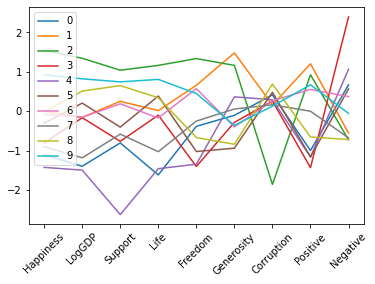

In [13]:
for i in range(10):
    plt.plot(kcluster.cluster_centers_[i], label=i)
plt.xticks(range(9), key_vars, rotation=45)
plt.legend()

In the plot above, each line represents the centroid of one cluster (for clusters labeled 0 through 9).  For each cluster, there is a group of countries whose indicator profiles lie near to these centroids.

The code cell below defines a function called ```plot_cluster_and_centroid```, which takes as input an integer cluster label, and plots all country profiles within the cluster (in different colors) along with the centroid profile (plotted with a black dashed line and black point markers).

After the function definition, the function is called to produce a plot for cluster label 0.

Modify the cluster label being passed to the function in order to view each of the other 9 clusters that have been produced.

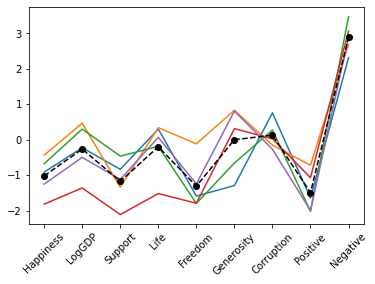

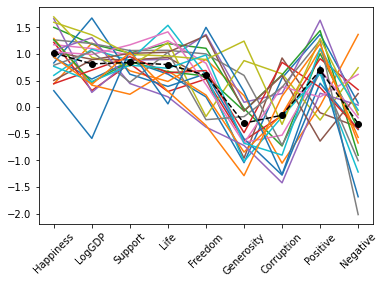

In [11]:
def plot_cluster_and_centroid(label):
    X_scaled_clustered[X_scaled_clustered.klabel==label][key_vars].T.plot(legend=False)
    plt.plot(kcluster.cluster_centers_[label], 'ko--')
    plt.xticks(range(9), key_vars, rotation=45)

plot_cluster_and_centroid(0)
plot_cluster_and_centroid(1)

Compare the results produced by k-means clustering to the region information that is stored in the ```df2_clustered``` dataframe.  
Group the data in ```df2_clustered``` by both 'klabel' and 'region', and compute the size of each (klabel, region) pair.  

In [15]:
df2_clustered.groupby(['klabel','region']).size()

klabel  region                            
0       Commonwealth of Independent States     1
        Middle East and North Africa           3
        Sub-Saharan Africa                     1
1       Central and Eastern Europe             3
        Commonwealth of Independent States     1
        East Asia                              2
        Latin America and Caribbean            7
        Middle East and North Africa           4
        North America and ANZ                  1
        Western Europe                         4
2       Commonwealth of Independent States     1
        Middle East and North Africa           4
        Sub-Saharan Africa                     3
3       Commonwealth of Independent States     1
        South Asia                             3
        Sub-Saharan Africa                    22
4       East Asia                              1
        Middle East and North Africa           2
        North America and ANZ                  3
        Southeast Asia    

Another widely used clustering method is known as [Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering), some variants of which are known as agglomerative clustering. It provides insight into these hierarchical relationships among clusters.

(The sklearn package provides objects and methods for `AgglomerativeClustering` that operate similarly to the way that the KMeans object worked in the exercises above, by creating a clustering object and then fitting it to the dataset of interest. There is some code showing a [simple example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).

Instead, I will work with seaborn (sns), which provides a useful function called ```clustermap``` that performs a hierarchical clustering and displays the results.  The clustermap function is described in the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap).  

Execute a call to ```sns.clustermap``` to operate on the ```X_scaled``` dataframe. This is to cluster the data in  ```X_scaled```.

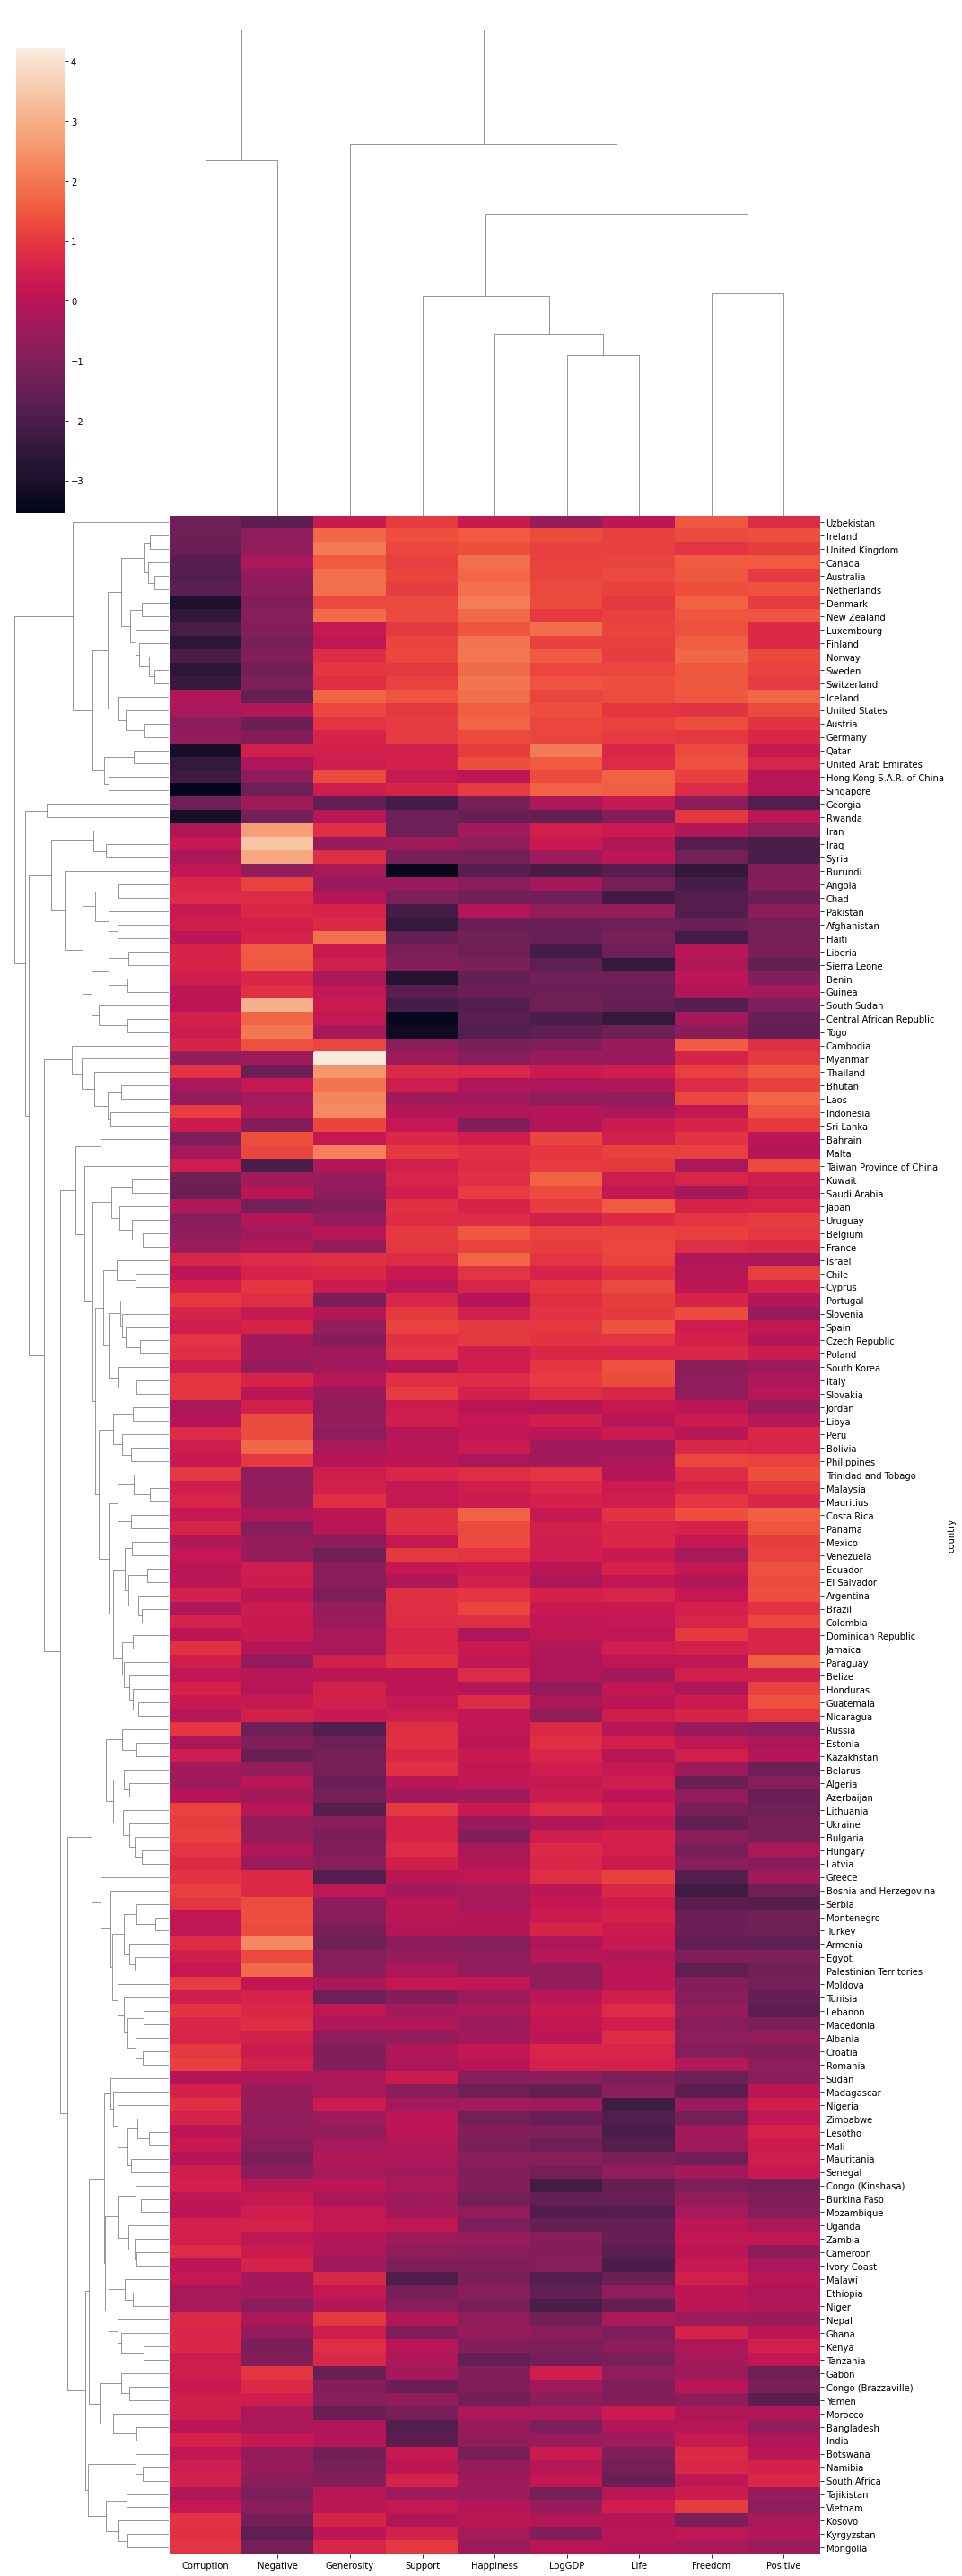

In [16]:
sns.clustermap(X_scaled, method = 'average', metric = 'euclidean', figsize= (15,40))

Whereas our original heatmap ordered the countries alphabetically, with a more or less random pattern of indicator values as a result, this clustermap has reordered the rows to reflect the clustering.
 
The clustering algorithm works from the bottom up: It finds several pairs of countries that are highly similar within each pair (smallest euclidean distance between them, in this version of the analysis), and then finds other countries that are similar to each pair.  Thus the algorithm grows clusters by accreting (or agglomerating) onto groupings that have already been identified.  The similarity between two countries in the tree is reflected by how far you need to go "up" the tree from one country and then back "down" to the other one.  If you go far enough up the tree, all countries are similar enough to each other to be grouped in one big cluster, similar to how all people are related to one another if we go back far enough in time.  Two countries that are near each other vertically in the reordered heatmap tend to be more similar to each other, but that is not strictly the case.  At particular parts of the dendogram different branches end up getting placed nearby each other in this 2D representation, but their distance from each other up and back down the tree could be very far.

Despite the fact that nearby ordering in the heatmap does not always reflect close similarity in the tree, one should be able to discern some clustering visually in the reordered heatmap, that is, groups of countries with similar WHR indicator profiles.  If one sees a group of countries with similar indicator profiles (similar patterns of colors in the heatmap), one should be able to identify the sub-tree on the left that group is associated with.

The columns of the dataset have also been clustered, with their own dendogram running along the top.  This is indicative of the fact that some groups of indicator variables are more closely associated among themselves, such as 'LogGDP' and 'Life' (life expectancy) which are clustered more closely together.  Clustering along both axes of a dataset is known as "biclustering", and is turned on by default in ```clustermap```.  To cluster only along one axis, modify either the `row_cluster` or `col_cluster` options to the function.

Finally, we have chosen just one set of criteria to carry out this clustering (```method='average'``` and ```metric='euclidean'```).  In order to identify groups of similar items in a dataset, we need to specify mathematically what we mean by "similar."  In this case, we have defined the similarity of two data points based on their euclidean distance from each other (such that two identical items would be separated by zero distance).  But we could have chosen some other criterion instead, such as the correlation between two data points.  In addition, in hierarchical clustering, one needs to specify not only how similar two *data points* are, but also to specify how similar two *clusters* are (since it is building up clusters of clusters).  This is what the `method` parameter is about (or more specifically, what is called the "linkage method").  The similarity between two clusters might be based on how similar their two closest items are, or their two most distant items, or the average distance between all pairs of points in each cluster.
